<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_4_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.

Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает.

In [1]:
import random as python_random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D
import os

In [3]:
batch_size = 128
num_classes = 10
epochs = 8
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170498071/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

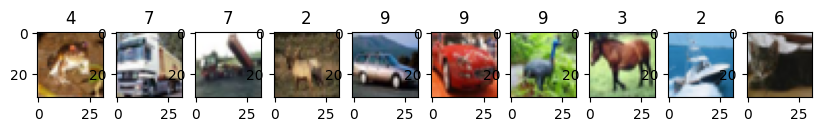

In [7]:
plot_images(x_train[:10], y_train[10:20])

In [8]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [9]:
datagen[0]

TypeError: 'ImageDataGenerator' object is not subscriptable

In [10]:
dg = datagen.flow(x_train[:5], batch_size=1)

In [11]:
dg[0]

array([[[[0.999165  , 0.999165  , 0.999165  ],
         [0.999165  , 0.999165  , 0.999165  ],
         [0.999165  , 0.999165  , 0.999165  ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99691343, 0.99691343, 0.99691343],
         [0.99691343, 0.99691343, 0.99691343],
         [0.99691343, 0.99691343, 0.99691343],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.2713224 , 0.3037609 , 0.29770035],
         [0.25522918, 0.304283  , 0.30366042]

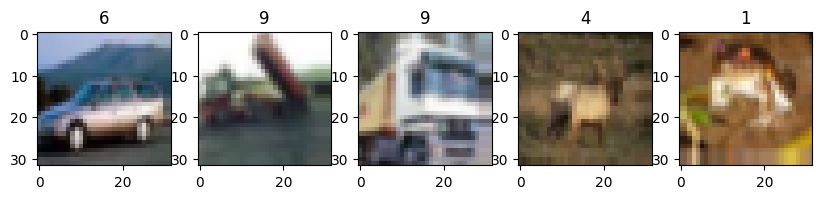

In [12]:
plot_images(dg, y_train[:5])

In [13]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (2, 2), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))
model.add(Conv2D(32, (1, 1)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# # конфигурирование слоев нейросети
# model = Sequential()

# # слои нейросети отвественные за свертку и max-pooling
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
# model.add(Activation('tanh'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('tanh'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.06))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('tanh'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('tanh'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.06))

# # полносвязные слои нейронной сети
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('tanh'))
# model.add(Dropout(0.12))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

In [ ]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

In [ ]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

In [ ]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Выводы:

Простая смена функции активации с relu на tanh + снижение Dropout в 2 раза позволила увеличить accuracy на тестовой выборке с 0,5 до 0,55
Уменьшение размера партии c 128 до 64 (batch) уменьшает точность
Замена функции активации в последнем слое активации с softmax на иную будет снижать точность.
Помимо конфигурирования слоев необходимо тюнить Dropout под каждую конфигурацию: уменьшение Convolution в первом слое с (3, 3) на (2, 2) и (1, 1) вместе с увеличением Dropout-ов с 0,06 до 0,1 привело к росту точности модели до 0,62.

Задание 2.

Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Для MNIST:

Необходимо понизить количество входящих каналов до 2 (черный и белый)
Увеличить количество слоёв
Увеличить количество эпох
Тюнинг Dropout-ов
Для CIFAR100:

Увеличить количество выходных классов до 100
Возможно понадобится пересмотр архитектуры, так как в CIFAR100 классы объединены в суперклассы по 5. Таким образом сеть должна сначала отнести изображение к одному из 20 суперклассов, затем уже определять к какому из классов внутри суперкласса относится тестовое изображение.
Свертки и ядра возможно останутся такими же как в текущей модели, однако понадобится увеличение количества слоёв/эпох.
Тюнинг Dropout-ов
Для IMAGENET:

Для анализа сета скорее всего потребуется ансамбль нейросетей, т.к. датасет очень большой.
Следует использовать подход сеть-внутри-сети
Учитывая что классов большое количество следует ограничить выборку.
Количество выходных классов нужно увеличить, также увеличить свертки/пулинги
Также понадобится увеличение количества слоёв/эпох